# KNN

In [38]:
#librerias
import sklearn
import numpy as np
import pandas as pd
from sklearn import metrics
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict
from statsmodels.stats.proportion import proportion_confint
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Proceso General y Preparación de Datos

In [39]:
x = pd.read_csv('preprocessed_encoded.csv')
df_match = pd.read_csv('preprocessed.csv')
y = df_match['match']

In [40]:
x.head()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,field_physics [astrophysics],field_political science,field_psychology,field_psychology and english,field_social work,field_sociology,field_speech pathology,field_teaching of English,field_theory,field_working
0,1.0,21.0,27.0,6.0,2.0,4.0,35.0,20.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,21.0,22.0,1.0,2.0,4.0,60.0,0.0,0.0,40.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,21.0,22.0,1.0,2.0,4.0,19.0,18.0,19.0,18.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,21.0,23.0,2.0,2.0,4.0,30.0,5.0,15.0,40.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,21.0,24.0,3.0,2.0,4.0,30.0,10.0,20.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
print(x.shape)
print(y.shape)

(8378, 332)
(8378,)


In [42]:
# Dividir los datos en conjunto de entrenamiento y prueba con un 20% de los datos para prueba
X_train, X_test, y_train1, y_test1 = train_test_split(x, y,  test_size=0.2, random_state=1, stratify=y)

In [43]:
# Normalization
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [44]:
# Balancear el conjunto de datos
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train1, y_train1)
X_test, y_test = ros.fit_resample(X_test1, y_test1)

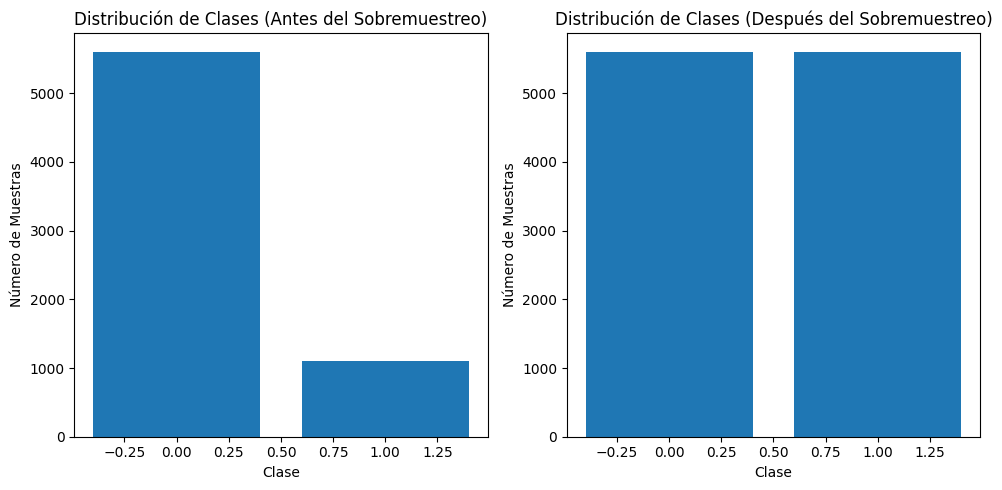

Proporción de clases antes del sobremuestreo:
match
0    0.835273
1    0.164727
Name: count, dtype: float64

Proporción de clases después del sobremuestreo:
match
0    0.5
1    0.5
Name: count, dtype: float64


In [45]:
# Contar las clases en los conjuntos de datos originales
original_class_counts = pd.Series(y_train1).value_counts()

# Contar las clases en los conjuntos de datos sobremuestreados
resampled_class_counts = pd.Series(y_train).value_counts()

# Visualizar la distribución de clases antes y después del sobremuestreo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(original_class_counts.index, original_class_counts.values)
plt.title('Distribución de Clases (Antes del Sobremuestreo)')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')

plt.subplot(1, 2, 2)
plt.bar(resampled_class_counts.index, resampled_class_counts.values)
plt.title('Distribución de Clases (Después del Sobremuestreo)')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')

plt.tight_layout()
plt.show()

# Imprimir la proporción de clases antes y después del sobremuestreo
print("Proporción de clases antes del sobremuestreo:")
print(original_class_counts / len(y_train1))
print("\nProporción de clases después del sobremuestreo:")
print(resampled_class_counts / len(y_train))


**EVALUACIÓN SIMLE**

In [46]:
# Create a kNN classifier object
knc = KNeighborsClassifier()

# Entrenar el clasificador kNN
knc.fit(X_train, y_train)

print(knc.score(X_test, y_test))

0.6760714285714285


In [47]:
# Matriz de confusión
y_pred = knc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[994 406]
 [501 899]]


In [48]:
# se imprime el reporte de clasificación
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1400
           1       0.69      0.64      0.66      1400

    accuracy                           0.68      2800
   macro avg       0.68      0.68      0.68      2800
weighted avg       0.68      0.68      0.68      2800



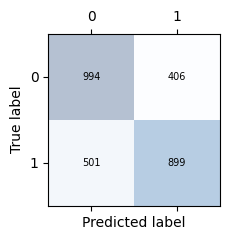

In [49]:
confmat = sklearn.metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [50]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Desde 10% hasta 100% del conjunto de entrenamiento
train_scores = []
test_scores = []


In [51]:
for train_size in train_sizes:
    if train_size < 1.0:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=1, stratify=y_train)
    else:
        X_train_subset, y_train_subset = X_train, y_train  # Usa todo el conjunto de entrenamiento

    knc = KNeighborsClassifier(n_neighbors=3)
    knc.fit(X_train_subset, y_train_subset)
    train_scores.append([knc.score(X_train_subset, y_train_subset)])
    test_scores.append([knc.score(X_test, y_test)])

In [52]:
# Convertir listas a arrays de NumPy y garantizar que son 2D
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

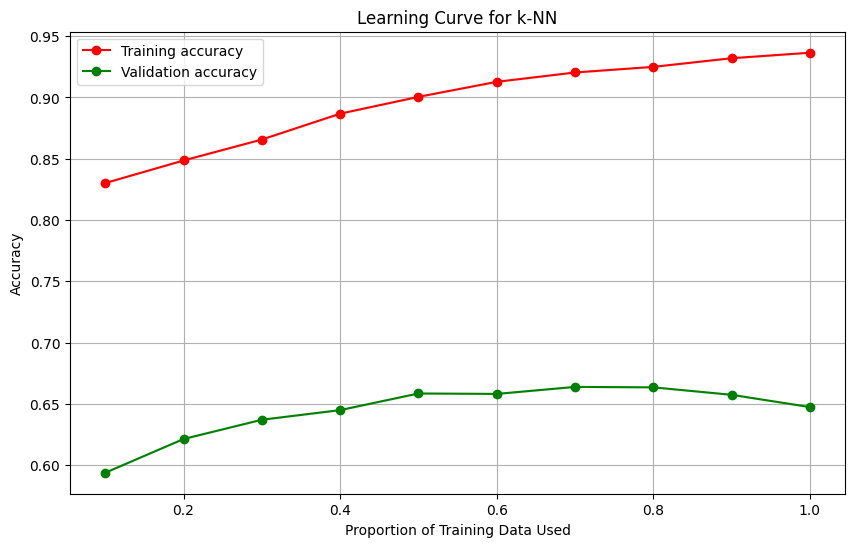

In [53]:
# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training accuracy")
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1), 
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), color="r", alpha=0.1)
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Validation accuracy")
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), color="g", alpha=0.1)
plt.title('Learning Curve for k-NN')
plt.xlabel('Proportion of Training Data Used')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**VALIDACIÓN CRUZADA**

In [54]:
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_train, y=y_train, cv=10, scoring='accuracy')

print(cv_scores)

[0.80714286 0.82232143 0.81964286 0.81785714 0.81785714 0.825
 0.8150134  0.81858803 0.8051832  0.82841823]


In [55]:
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.8177024288267587
0.006851875937267688


In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Asegúrate de que estás utilizando KNeighborsClassifier directamente sin el prefijo 'nb'
predicted = cross_val_predict(KNeighborsClassifier(), X=X_train, y=y_train, cv=10)

# Usa y_train en lugar de y para asegurar que estás comparando las predicciones con el conjunto correcto
print(confusion_matrix(y_train, predicted))



[[3838 1760]
 [ 281 5317]]


In [57]:
print(accuracy_score(y_train, predicted))

0.8177027509824938


In [58]:
print(metrics.classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      5598
           1       0.75      0.95      0.84      5598

    accuracy                           0.82     11196
   macro avg       0.84      0.82      0.81     11196
weighted avg       0.84      0.82      0.81     11196



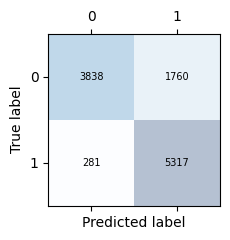

In [59]:
confmat = sklearn.metrics.confusion_matrix(y_train, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [60]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1400
           1       0.69      0.64      0.66      1400

    accuracy                           0.68      2800
   macro avg       0.68      0.68      0.68      2800
weighted avg       0.68      0.68      0.68      2800



**Evaluación de k-NN con diferentes números de vecinos (k)**

validación cruzada para evaluar el rendimiento de k-NN con distintos valores de 
𝑘
k (número de vecinos).

In [61]:
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_train, y=y_train,  cv=10)
print("Accuracy 1 neighbour:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_train, y=y_train,  cv=10)
print("Accuracy 3 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_train, y=y_train,  cv=10)
print("Accuracy 5 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_train, y=y_train,  cv=10)
print("Accuracy 7 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_train, y=y_train,  cv=10)
print("Accuracy 9 neighbours:",  np.mean(cv_scores))

Accuracy 1 neighbour: 0.9295297938210136
Accuracy 3 neighbours: 0.8695962594152944
Accuracy 5 neighbours: 0.8177024288267587
Accuracy 7 neighbours: 0.7799219647644581
Accuracy 9 neighbours: 0.7599125494701902


In [62]:
lista=[]
for i in range(1, 11):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=i), X=X_train, y=y_train,  cv=10)
    lista.append(np.mean(cv_scores))
    print("Accuracy", i ,"neighbour:", np.mean(cv_scores))

print()
print("Accuracy", lista.index((max(lista))) + 1, "neighbour:", max(lista))


Accuracy 1 neighbour: 0.9295297938210136
Accuracy 2 neighbour: 0.9197052534150391
Accuracy 3 neighbour: 0.8695962594152944
Accuracy 4 neighbour: 0.8514645570024255
Accuracy 5 neighbour: 0.8177024288267587
Accuracy 6 neighbour: 0.8026101908591855
Accuracy 7 neighbour: 0.7799219647644581
Accuracy 8 neighbour: 0.7744722647772245
Accuracy 9 neighbour: 0.7599125494701902
Accuracy 10 neighbour: 0.7550904027830972

Accuracy 1 neighbour: 0.9295297938210136


In [63]:
lista=[]
for i in range(1, 11):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors= i,weights='distance'), X=X_train, y=y_train,  cv=10)
    lista.append(np.mean(cv_scores))
    print("Accuracy", i ,"neighbour: and distance weighting:", np.mean(cv_scores))

print()
print("Accuracy", lista.index((max(lista))) + 1,"neighbour: and distance weighting:", max(lista))


Accuracy 1 neighbour: and distance weighting: 0.9295297938210136
Accuracy 2 neighbour: and distance weighting: 0.9295297938210136
Accuracy 3 neighbour: and distance weighting: 0.8775457998212689
Accuracy 4 neighbour: and distance weighting: 0.8796000095748754
Accuracy 5 neighbour: and distance weighting: 0.8432477179879996
Accuracy 6 neighbour: and distance weighting: 0.8493213806970509
Accuracy 7 neighbour: and distance weighting: 0.826366254947019
Accuracy 8 neighbour: and distance weighting: 0.8393170720030639
Accuracy 9 neighbour: and distance weighting: 0.8267237967573087
Accuracy 10 neighbour: and distance weighting: 0.8310999936167496

Accuracy 1 neighbour: and distance weighting: 0.9295297938210136


    Validación Cruzada en GridSearchCV

In [64]:
params = {'n_neighbors':list(range(1,30)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 1, 'weights': 'distance'} Accuracy= 0.9295297938210136


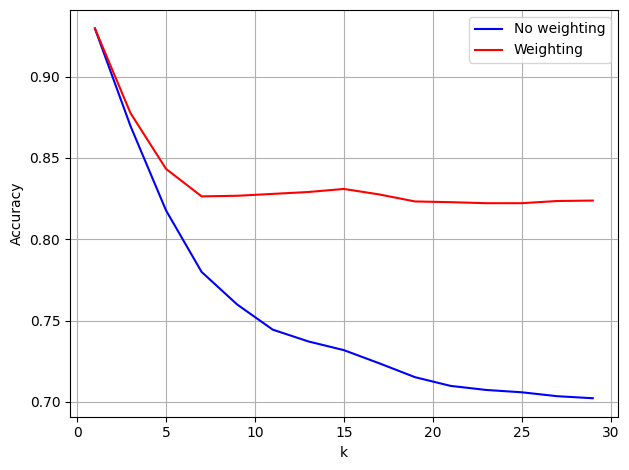

In [65]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [67]:
# Define el clasificador
knc = KNeighborsClassifier(n_neighbors=1)

In [68]:
# Configura los tamaños de entrenamiento y realiza la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knc,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=-1
)

In [69]:
# Calcular la media y la desviación estándar del score de entrenamiento y prueba para cada cantidad de datos
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

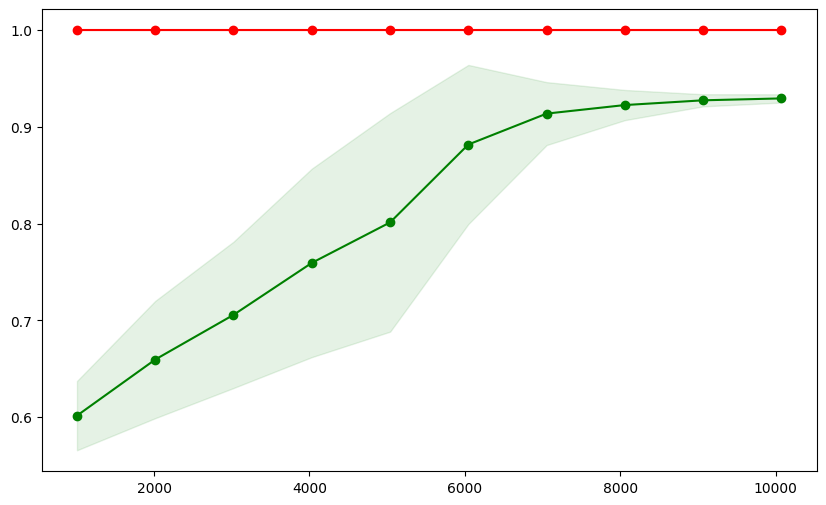

In [70]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

In [76]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print(sklearn.metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test,pred))

[[1237  163]
 [ 876  524]]
0.6289285714285714
              precision    recall  f1-score   support

           0       0.59      0.88      0.70      1400
           1       0.76      0.37      0.50      1400

    accuracy                           0.63      2800
   macro avg       0.67      0.63      0.60      2800
weighted avg       0.67      0.63      0.60      2800



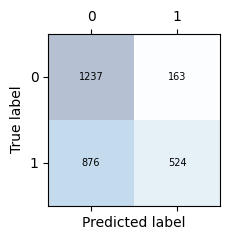

In [77]:
confmat = sklearn.metrics.confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [72]:
# interval confidence
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
# or equivalent
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.629 +/- 0.018


(0.6110349396609629, 0.6468222031961799)

In [73]:
#Using Binomial distribution
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

(0.6107262422435908, 0.6468015850081834)

In [74]:
# Build two classifiers
# Classifier 1 (3 Neighbours) successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=3), X=x, y=y,  cv=10)
res1=np.zeros(y.shape)
res1[y_pred==y]=1

# Classifier 2 (7 Neighbours) 2 successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=7), X=x, y=y,  cv=10)
res2=np.zeros(y.shape)
res2[y_pred==y]=1

# Build contingency matrix
n00 = np.sum([res1[res2==1]==1])
n11 = np.sum([res1[res2==0]==0])
n10 = np.sum([res1[res2==1]==0])
n01 = np.sum([res1[res2==0]==1])

# Chi -square test
print("Have the classifiers significant different accuracy?:",(np.abs(n01-n10)-1)**2/(n01+n10)>3.84)

Have the classifiers significant different accuracy?: True
